In [2]:
import sklearn.neural_network
#import torch
import sklearn
import pandas as pd
import numpy as np
#import ast
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [3]:
#Take random segments of the full array
def sample_random_segments(arr1, segment_length, num_samples):
    if len(arr1) < segment_length:
        raise ValueError("Segment length must be smaller than or equal to array length.")
    
    max_start_index = len(arr1) - segment_length  # Ensure segment stays within bounds
    start_indices = np.random.randint(0, max_start_index + 1, size=num_samples)

    segments_ph = np.empty((0,segment_length))

    for i in start_indices:
        segments_ph = np.vstack((segments_ph,np.array(arr1[i:i+segment_length])))
    #segments = ([np.array(arr[i:i + segment_length]) for i in start_indices])
    return segments_ph

In [4]:
Data = pd.read_pickle("Sim_Data_Noisy_Interp.pkl")
#y = np.transpose(np.vstack((Data["x_tag"].to_numpy(),Data["y_tag"].to_numpy(),Data["z_tag"].to_numpy())))
y = Data["y_tag"].to_numpy()
phases = np.vstack(Data["Phases"].to_numpy())
#X = np.hstack((phases,powers))
#print(pd.DataFrame(X).head())
num_of_samples_each = 5
X_new = np.empty((0,125))

#print(np.array(sample_random_segments(phases[0,:],powers[0,:],10,num_of_samples_each)))
for i in range(0,phases.shape[0]):
    tempX = np.array(sample_random_segments(phases[i,:],125,num_of_samples_each)) 
    X_new = np.vstack((X_new,tempX))
y_new = np.repeat(y,num_of_samples_each)
#print(y_new)
#print(X_new.shape)
#print(y_new.shape)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


R^2 Score: 0.9891688542343627


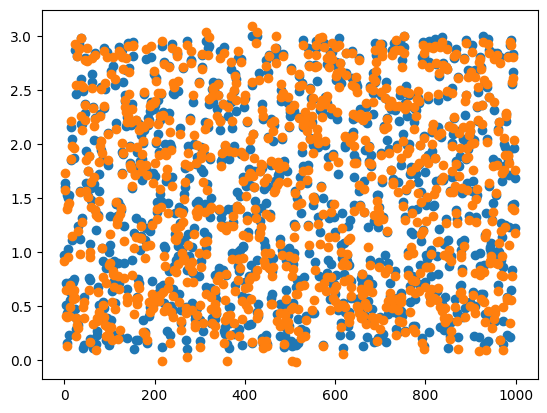

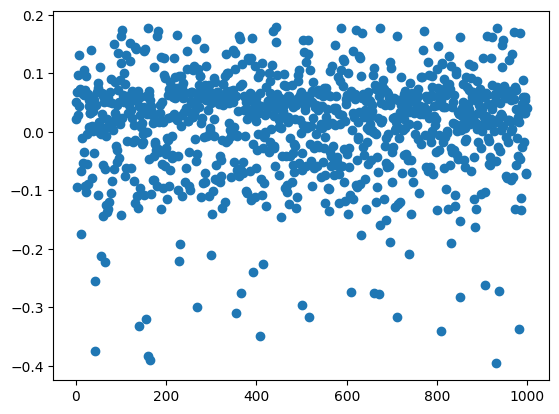

In [5]:

mlp = sklearn.neural_network.MLPRegressor(random_state=42, max_iter=2000, tol=0.1,hidden_layer_sizes=(1000,100),activation="relu",solver="adam",alpha=0.01)


# Train the model with the scaled data
mlp.fit(X_train_scaled, y_train)
y_hat = mlp.predict(X_test_scaled)
print("R^2 Score:", mlp.score(X_test_scaled, y_test))


plt.figure()
x = np.arange(0,len(y_test))
plt.scatter(x,y_test)
plt.scatter(x,y_hat)
plt.show()
plt.figure()
e = y_test-y_hat
plt.scatter(x,e)
plt.show()


Accuracy 0.992379284589599


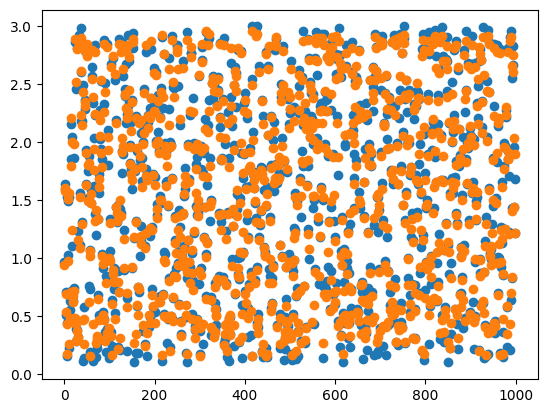

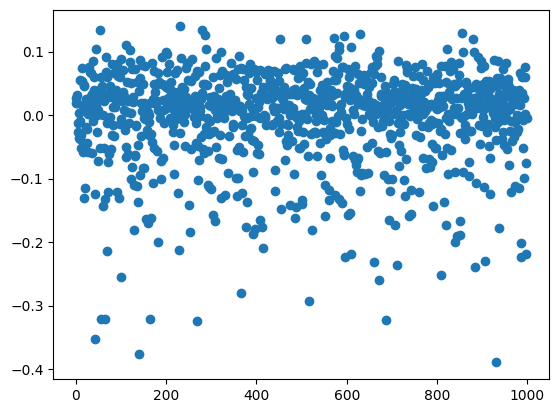

In [6]:
# Train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=1000, learning_rate=0.01)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_hat = xgb_model.predict(X_test_scaled)
print("Accuracy", xgb_model.score(X_test_scaled, y_test))



plt.figure()
x = np.arange(0,len(y_test))
plt.scatter(x,y_test)
plt.scatter(x,y_hat)
plt.show()
plt.figure()
e = y_test-y_hat
plt.scatter(x,e)
plt.show()
